In [1]:
"""import urllib.request

url = "https://raw.githubusercontent.com/karpathy/ng-video-lecture/refs/heads/master/input.txt"
filename = "input.txt"

urllib.request.urlretrieve(url, filename)
print(f"{filename} has been downloaded.")"""

'import urllib.request\n\nurl = "https://raw.githubusercontent.com/karpathy/ng-video-lecture/refs/heads/master/input.txt"\nfilename = "input.txt"\n\nurllib.request.urlretrieve(url, filename)\nprint(f"{filename} has been downloaded.")'

In [2]:
filename = 'input.txt'
with open (filename, 'r', encoding= 'utf-8' ) as f:
    text = f.read()

In [3]:
print (f"length of dataset in characters: {len(text)}")

length of dataset in characters: 1115394


In [4]:
print (text[:1000])  # print the first 1000 characters

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print (f"vocab size: {vocab_size}")


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65


In [6]:
# Define the vocabulary mapping for tokenization
char_to_index = {char: idx for idx, char in enumerate(chars)}
index_to_char = {idx: char for idx, char in enumerate(chars)}

def tokenize(text):
    """Converts a string into a list of integer token IDs."""
    return [char_to_index[char] for char in text]

def detokenize(token_ids):
    """Converts a list of integer token IDs back into a string."""
    return ''.join([index_to_char[idx] for idx in token_ids])
tokenized_text = tokenize("hello world")
print(tokenized_text)
print(detokenize(tokenized_text))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [7]:
import torch
data = torch.tensor(tokenize(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])  # print the first 1000 token IDs

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [8]:
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [9]:
block_size = 8  # context length
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [10]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1] # 'context' is the "history" the model sees so far (from start to current index t)
    target = y[t] # 'target' is the specific token that comes immediately after that context
    print(f"when input is {context.tolist()} the target: {target.item()}")  

when input is [18] the target: 47
when input is [18, 47] the target: 56
when input is [18, 47, 56] the target: 57
when input is [18, 47, 56, 57] the target: 58
when input is [18, 47, 56, 57, 58] the target: 1
when input is [18, 47, 56, 57, 58, 1] the target: 15
when input is [18, 47, 56, 57, 58, 1, 15] the target: 47
when input is [18, 47, 56, 57, 58, 1, 15, 47] the target: 58


In [11]:
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    
    context_str = detokenize(context.tolist())
    target_char = detokenize([target.item()])
    
    # Notice the str() wrapping the numeric values
    print(f"Context IDs: {str(context.tolist()):<30} | Text: '{context_str}'")
    print(f"Target ID:   {str(target.item()):<10} | Next: '{target_char}'")
    print("-" * 60)

Context IDs: [18]                           | Text: 'F'
Target ID:   47         | Next: 'i'
------------------------------------------------------------
Context IDs: [18, 47]                       | Text: 'Fi'
Target ID:   56         | Next: 'r'
------------------------------------------------------------
Context IDs: [18, 47, 56]                   | Text: 'Fir'
Target ID:   57         | Next: 's'
------------------------------------------------------------
Context IDs: [18, 47, 56, 57]               | Text: 'Firs'
Target ID:   58         | Next: 't'
------------------------------------------------------------
Context IDs: [18, 47, 56, 57, 58]           | Text: 'First'
Target ID:   1          | Next: ' '
------------------------------------------------------------
Context IDs: [18, 47, 56, 57, 58, 1]        | Text: 'First '
Target ID:   15         | Next: 'C'
------------------------------------------------------------
Context IDs: [18, 47, 56, 57, 58, 1, 15]    | Text: 'First C'
Targe

In [12]:
torch.manual_seed(2971)
batch_size = 4  # Number of independent sequences to process in parallel
block_size = 8  # Maximum length of the sequence (context) for predictions

def get_batch(split_type):
    """
    Constructs a batch of inputs (x) and targets (y).
    Each target y is the input x shifted by one character.
    """
    # Select the appropriate dataset split
    dataset = train_data if split_type == 'train' else val_data
    
    # Generate 'batch_size' number of random starting points in the dataset
    # We subtract block_size to ensure we don't go out of bounds
    random_offsets = torch.randint(len(dataset) - block_size, (batch_size,))
    
    # Stack individual sequences into a single 2D Tensor (Batch, Block)
    input_batch = torch.stack([dataset[i : i + block_size] for i in random_offsets])
    
    # Target batch is shifted forward by one index
    target_batch = torch.stack([dataset[i + 1 : i + block_size + 1] for i in random_offsets])
    
    return input_batch, target_batch

# Generate a sample training batch
batch_inputs, batch_targets = get_batch('train')

print(f"Batch Inputs Shape: {batch_inputs.shape}")
print(f"Batch Targets Shape: {batch_targets.shape}")
print("-" * 60)

# Demonstrate the autoregressive training examples within the batch
for b_idx in range(batch_size):
    print(f"--- Processing Sequence {b_idx} in the Batch ---")
    
    for t_idx in range(block_size):
        # Extract the sequence history up to current time t
        context_tokens = batch_inputs[b_idx, : t_idx + 1]
        target_token = batch_targets[b_idx, t_idx]
        
        # Convert numeric IDs back to human-readable text
        context_text = detokenize(context_tokens.tolist())
        target_text = detokenize([target_token.item()])
        
        # Log the relationship between context and prediction
        print(f"Seq {b_idx}, Step {t_idx} | Context: {str(context_tokens.tolist()):<30} | Text: '{context_text}'")
        print(f"              | Next ID: {str(target_token.item()):<10} | Next Char: '{target_text}'")
    
    print("-" * 60)

Batch Inputs Shape: torch.Size([4, 8])
Batch Targets Shape: torch.Size([4, 8])
------------------------------------------------------------
--- Processing Sequence 0 in the Batch ---
Seq 0, Step 0 | Context: [54]                           | Text: 'p'
              | Next ID: 39         | Next Char: 'a'
Seq 0, Step 1 | Context: [54, 39]                       | Text: 'pa'
              | Next ID: 56         | Next Char: 'r'
Seq 0, Step 2 | Context: [54, 39, 56]                   | Text: 'par'
              | Next ID: 49         | Next Char: 'k'
Seq 0, Step 3 | Context: [54, 39, 56, 49]               | Text: 'park'
              | Next ID: 50         | Next Char: 'l'
Seq 0, Step 4 | Context: [54, 39, 56, 49, 50]           | Text: 'parkl'
              | Next ID: 47         | Next Char: 'i'
Seq 0, Step 5 | Context: [54, 39, 56, 49, 50, 47]       | Text: 'parkli'
              | Next ID: 52         | Next Char: 'n'
Seq 0, Step 6 | Context: [54, 39, 56, 49, 50, 47, 52]   | Text: 'parklin'
  

In [13]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# Set seed for reproducibility
torch.manual_seed(2971)

class BigramLanguageModel(nn.Module):
    """
    A simple Bigram Language Model. 
    It predicts the next character based solely on the current character.
    """
    def __init__(self, vocab_size):
        super().__init__()
        # Each token's ID acts as an index to look up the 'logits' (scores) 
        # for what character should come next.
        # Shape: (vocab_size, vocab_size)
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, indices, targets=None):
        """
        Calculates the scores (logits) for the next character in a sequence.
        indices: (Batch, Time) tensor of integers
        targets: (Batch, Time) tensor of integers
        """
        # We look up the 'logits' for the next token directly from the table
        # Output shape: (Batch, Time, Channels/Vocab_Size)
        logits = self.token_embedding_table(indices)

        if targets is None:
            loss = None
        else:
            # PyTorch's cross_entropy expects the 'Channels' to be the 2nd dimension
            # We flatten the Batch and Time dimensions to calculate loss across the whole batch
            batch_size, sequence_length, vocab_channels = logits.shape
            
            # Reshape to (Batch * Time, Vocab_Size)
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            
            # Reshape targets to (Batch * Time)
            targets_flattened = targets.view(batch_size * sequence_length)
            
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        """
        Generates new text by repeatedly sampling from the model's predictions.
        indices: (Batch, Time) current context of tokens
        """
        for _ in range(max_new_tokens):
            # 1. Get predictions for the current sequence
            logits, _ = self(indices)

            # 2. Bigram models only care about the very last token in the sequence
            # We pluck out the last 'Time' step: (Batch, Channels)
            last_token_logits = logits[:, -1, :] 

            # 3. Convert raw scores to probabilities
            probabilities = F.softmax(last_token_logits, dim=-1) 

            # 4. Randomly pick the next token based on the probability distribution
            next_token_index = torch.multinomial(probabilities, num_samples=1) 

            # 5. Concatenate the new token to the existing sequence and repeat
            indices = torch.cat((indices, next_token_index), dim=1) 

        return indices

In [14]:
# 1. Initialize the model with the size of our character vocabulary
# 'vocab_size' should be len(chars)
language_model = BigramLanguageModel(vocab_size)

# 2. Perform a forward pass using the training batch we generated earlier
# 'batch_inputs' is the context (X), 'batch_targets' is the correct next character (Y)
next_token_logits, training_loss = language_model(batch_inputs, batch_targets)

# 3. Output the results
print(f"Logits Tensor Shape (Batch, Time, Channels): {next_token_logits.shape}")
print(f"Current Training Loss: {training_loss.item():.4f}")

# --- Validation Logic ---
# Expected initial loss for a random model should be -ln(1/vocab_size)
import math
expected_initial_loss = -math.log(1/vocab_size)
print(f"Expected loss for a random model: {expected_initial_loss:.4f}")

Logits Tensor Shape (Batch, Time, Channels): torch.Size([4, 8, 65])
Current Training Loss: 4.7562
Expected loss for a random model: 4.1744


In [15]:
print(detokenize(language_model.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


TlpTGJdF$agYIANXYn&XRlSjhsx!ohSJZS$wwSFxKfmT.QHbXya?przr'VVj;M&R&X?zAFC-H-M$fP'BegXBpWYj&PRSyP,URmue


In [16]:
optimizer = torch.optim.AdamW(language_model.parameters(), lr=1e-3)

In [17]:
def train_model(model, optimizer, training_steps=10000, eval_interval=1000):
    """
    Trains the language model for a fixed number of steps.
    Returns the history of the training loss.
    """
    model.train()
    loss_history = []
    
    print(f"=== Starting Training for {training_steps} steps ===")
    
    for step in range(training_steps):
        # 1. Fetch a fresh batch of training data
        input_batch, target_batch = get_batch('train')
        
        # 2. Forward pass: compute predictions and current loss
        _, loss = model(input_batch, target_batch)
        
        # 3. Backward pass: compute gradients and update weights
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()
        
        # Periodically log progress and save history
        if step % eval_interval == 0 or step == training_steps - 1:
            loss_value = loss.item()
            loss_history.append(loss_value)
            print(f"Step [{step:5d}/{training_steps}] - Training Loss: {loss_value:.4f}")
            
    print(f"Training Complete. Final Loss: {loss.item():.4f}")
    return loss_history


def evaluate_model(model, eval_iterations=200):
    """
    Evaluates the model on both training and validation splits to check for overfitting.
    This replaces the 'test_model' function for Generative Models.
    """
    model.eval()
    split_losses = {}
    with torch.no_grad():
        for split in ['train', 'val']:
            # Accumulate loss over multiple random batches for a stable average
            batch_losses = torch.zeros(eval_iterations)
            for k in range(eval_iterations):
                inputs, targets = get_batch(split)
                _, loss = model(inputs, targets)
                batch_losses[k] = loss.item()
        
            split_losses[split] = batch_losses.mean().item()
    
        print(f"=== Evaluation Results ===")
        print(f"Train Loss: {split_losses['train']:.4f}")
        print(f"Val Loss:   {split_losses['val']:.4f}")
    
        model.train() # Switch back to training mode
    return split_losses

In [18]:
print(detokenize(language_model.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


eRGm?FP a'XjhbD,WlYC
LYTqZNaYTJLEsIOgRO!!MipTZYCbdI:hz.sNrptMiD;hLlv:-;$
ZQCjmP.OC
VViRVN-Oe:B.LeY-rtXAEFCuekCeJ'A?zaYhb-prsYv
kWmfMsmP&sj-WUsmaiHcfU$EUlTgUJCebTbd$qAuagi?d3NaiNFhtWzcerP
FYwTJDdh
ptN,C&X$Wlr'aV&RM$kZiAua;g?p'IAgS
TqXzQqwo?rQnR:e;eHmO$XuPHqXz-G$v$qbN-O'l
d.KiPuEaCm&-mPrP:p3kUF!yLcFxqXAFPVZaANUwQvBjd.
dx.se cqXWqBuL.&pPaHmogFLC$sH&zya,K.TGR
SsHZaVZl,IlI:aDtruksNrXS
oT.vF!3
ocZRG V; O$s mQIWfVlt BhDl,kDaxeOdyPaqBGw,,kyZyzCtCjhxXr.,!iBQKSi$q
eE!xNMigtGZWsj;rIwP?IOgFPa l.jvHyv
hpTqOj


In [19]:
# 1. Setup Optimizer
optimizer = torch.optim.AdamW(language_model.parameters(), lr=1e-3)

# 2. Train the model
history = train_model(language_model, optimizer, training_steps=5000)

# 3. Evaluate the results
final_metrics = evaluate_model(language_model)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.4525
Step [ 1000/5000] - Training Loss: 3.8915
Step [ 2000/5000] - Training Loss: 3.5034
Step [ 3000/5000] - Training Loss: 3.3032
Step [ 4000/5000] - Training Loss: 2.7819
Step [ 4999/5000] - Training Loss: 2.9525
Training Complete. Final Loss: 2.9525
=== Evaluation Results ===
Train Loss: 2.8127
Val Loss:   2.8380


In [20]:
print(detokenize(language_model.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


imabZCDZSs;$I me thoQ$d tENruarpo$; iD&ABl o d,KSy YHCnoc.rd a3c$,3dptathildt EV.Xs sedced:
LkjWhallNTharfMB.
SokCyCes wst d:
HN?UUQj! lyGEEchonms.s f pakof,  y ly' s inrWirzn TqNNC?UVpWQJ&Gfend 3CLYCig in jhobart Gfat,UCldves oreck-hyk an:--qkn
TO:ere:; m P!ats chtF!wig,
TrRou dwabyochowrteRDO$vifyrbbjlBe:SCK
CERuitl;;ee am;
TWqubFWh s Bed, NOlFxecroo$TJmere t bDTqOp,
TLYjhackCiu hioa'se'eY? '$xxfy.
M?ANa n

Fl, mis
Tq
Ciowe jde ho:
THpTand-Oue Aminw;rie ue orffLoyFPTq

YFo:
Lk

IOTU,CSEn:QMesc


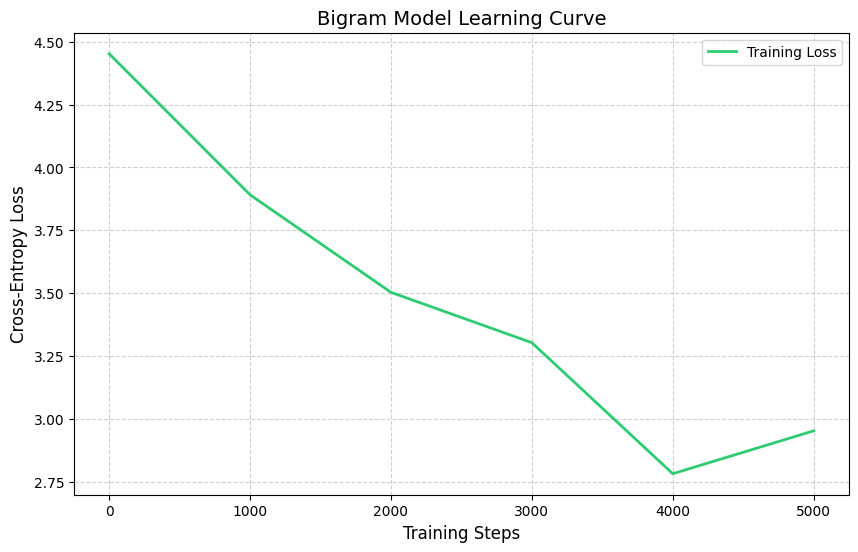

In [21]:
import matplotlib.pyplot as plt

def plot_learning_curve(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('Bigram Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()

# Call the function using the history from your training
plot_learning_curve(history, eval_interval=1000)

In [28]:
# Constants for dimensions: Batch (sentences), Time (words), Channels (features)
torch.manual_seed(2971)

batch_size, sequence_length, feature_dim = 4, 8, 2
x= torch.randn((batch_size, sequence_length, feature_dim))
# Initialize a tensor to store our 'Bag of Words' averages
# Shape: (4, 8, 2)
sequence_averages = torch.zeros((batch_size, sequence_length, feature_dim))

for b_idx in range(batch_size):
    for t_idx in range(sequence_length):
        # 1. Look at all information from the start up to the current time 't'
        # x_previous represents the "context" or "history"
        x_previous = x[b_idx, :t_idx+1] # Shape: (t_idx+1, feature_dim)

        # 2. Average the features across the time dimension
        # We want to summarize all previous words into one single average vector
        sequence_averages[b_idx, t_idx] = torch.mean(x_previous, dim=0)

In [29]:
x[0]

tensor([[ 1.7792, -2.1546],
        [-0.4116, -2.2617],
        [ 0.0260, -0.4797],
        [ 0.2665,  0.8673],
        [-0.3792,  0.9648],
        [-0.9572,  0.3034],
        [ 0.6326, -0.9814],
        [-1.4044, -0.6259]])

In [30]:
sequence_averages[0]

tensor([[ 1.7792, -2.1546],
        [ 0.6838, -2.2082],
        [ 0.4645, -1.6320],
        [ 0.4150, -1.0072],
        [ 0.2562, -0.6128],
        [ 0.0539, -0.4601],
        [ 0.1366, -0.5346],
        [-0.0560, -0.5460]])

In [32]:
tril_ones = torch.tril(torch.ones((3, 3)))
ones = torch.ones((3, 3))
random_matrix = torch.randn((3, 2))
print(f"Tril Matrix:\n{tril_ones}\n")
print(f"Ones Matrix:\n{ones}\n")
print(f"Random Matrix:\n{random_matrix}\n")
print(f"Tril Matrix * Random Matrix:\n{tril_ones @ random_matrix}\n")
print(f"Ones Matrix * Random Matrix:\n{ones @ random_matrix}\n")

Tril Matrix:
tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

Ones Matrix:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Random Matrix:
tensor([[ 0.7872, -1.6027],
        [-1.1632, -0.4532],
        [-0.1434,  0.2357]])

Tril Matrix * Random Matrix:
tensor([[ 0.7872, -1.6027],
        [-0.3760, -2.0559],
        [-0.5194, -1.8202]])

Ones Matrix * Random Matrix:
tensor([[-0.5194, -1.8202],
        [-0.5194, -1.8202],
        [-0.5194, -1.8202]])



In [33]:
# now if we normalize the tril matrix
tril_normalized = tril_ones / tril_ones.sum(dim=1, keepdim=True)
print(f"Normalized Tril Matrix:\n{tril_normalized}\n")
print(f"Normalized Tril Matrix * Random Matrix:\n{tril_normalized @ random_matrix}\n")

Normalized Tril Matrix:
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

Normalized Tril Matrix * Random Matrix:
tensor([[ 0.7872, -1.6027],
        [-0.1880, -1.0280],
        [-0.1731, -0.6067]])



In [34]:
#now let's vectorize it and use it in our model since this is the mathematical trick used in attention mechanisms
torch.manual_seed(2971)
weighted_sum = torch.tril(torch.ones((sequence_length, sequence_length)))
weighted_sum = weighted_sum / weighted_sum.sum(dim=1, keepdim=True)
weighted_sum

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [35]:
new_sequence_averages = weighted_sum @ x
torch.allclose(new_sequence_averages, sequence_averages)

True

In [36]:
#now let's do it again but this time using softmax to get the weights
import torch.nn.functional as F
torch.manual_seed(2971)
tril = torch.tril(torch.ones((sequence_length, sequence_length)))
new_weights = torch.zeros((sequence_length, sequence_length))
new_weights = new_weights.masked_fill(tril == 0, float('-inf'))
new_weights = F.softmax(new_weights, dim=-1)
another_sequence_averages = new_weights @ x
torch.allclose(another_sequence_averages, sequence_averages)

True

In [40]:
#let's do it again but this time lets see how a single head perform self-attention
torch.manual_seed(2971)
batch_size, sequence_length, feature_dim = 4, 8, 2
x= torch.randn((batch_size, sequence_length, feature_dim))
head_size = 16
# now imagine token is speaking: it's telling every other tokens the following:
key = nn.Linear(feature_dim, head_size, bias=False)   # here is what I have to say
query = nn.Linear(feature_dim, head_size, bias=False) # here is what I'm looking for
value = nn.Linear(feature_dim, head_size, bias=False) # if you find me interesting here is the information I carry


k = key(x)  # (Batch, Time, Head_Size)
q = query(x)  # (Batch, Time, Head_Size)
v = value(x)  # when we apply value on the current x it gives us self-attention, but we can also apply it on other tokens to get cross-attention, something like we do for decoding an encoder

new_weighted_matrix = q @ k.transpose(-2, -1) # (Batch, Time, Head_Size) @ (Batch, Head_Size, Time) -> (Batch, Time, Time)
new_weighted_matrix = new_weighted_matrix.masked_fill(tril == 0, float('-inf')) # we use this so the current token does not speak to future tokens and only learns from previous tokens
# if we delete the above line, the model will be non-causal and will be able to look into the future tokens, like encoder blocks in transformers, but now this structure is more like decoder blocks in transformers
new_weighted_matrix = F.softmax(new_weighted_matrix, dim=-1)



out = new_weighted_matrix @ v  # (Batch, Time, Time) @ (Batch, Time, Feature_Dim) -> (Batch, Time, Feature_Dim)
out.shape

torch.Size([4, 8, 16])

In [39]:
new_weighted_matrix[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9895, 0.0105, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5263, 0.1643, 0.3094, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1360, 0.6421, 0.1615, 0.0605, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0267, 0.4949, 0.1770, 0.0917, 0.2097, 0.0000, 0.0000, 0.0000],
        [0.0064, 0.0706, 0.0959, 0.1336, 0.2867, 0.4067, 0.0000, 0.0000],
        [0.6661, 0.0222, 0.0524, 0.0873, 0.0324, 0.0124, 0.1273, 0.0000],
        [0.0028, 0.0078, 0.0525, 0.2325, 0.3661, 0.2242, 0.0210, 0.0930]],
       grad_fn=<SelectBackward0>)

In [ ]:
# one important thing we have to do for the weighted matrix is to scale it, because the dot products can get large in magnitude which can push the softmax into regions where it has extremely small gradients
# and that may cause the model to not learn properly. by scaling the weighted matrix we are going to sharpen the distribution of important nodes.
# we do it by deviding by the square root of head_size before sending it to softmax

new_weighted_matrix = new_weighted_matrix / (head_size ** 0.5)

In [43]:
new_weighted_matrix[0]

tensor([[0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2474, 0.0026, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1316, 0.0411, 0.0774, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0340, 0.1605, 0.0404, 0.0151, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0067, 0.1237, 0.0443, 0.0229, 0.0524, 0.0000, 0.0000, 0.0000],
        [0.0016, 0.0177, 0.0240, 0.0334, 0.0717, 0.1017, 0.0000, 0.0000],
        [0.1665, 0.0055, 0.0131, 0.0218, 0.0081, 0.0031, 0.0318, 0.0000],
        [0.0007, 0.0020, 0.0131, 0.0581, 0.0915, 0.0561, 0.0052, 0.0233]],
       grad_fn=<SelectBackward0>)

In [62]:
#let's create one head of a self-attention mechanism


class Head(nn.Module):
    """ One head of self-attention """

    def __init__(self, feature_dim, head_size):
        super().__init__()
        self.key = nn.Linear(feature_dim, head_size, bias=False)
        self.query = nn.Linear(feature_dim, head_size, bias=False)
        self.value = nn.Linear(feature_dim, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones((block_size, block_size))))

    def forward(self, x):
        batch_size, sequence_length, feature_dim = x.shape

        k = self.key(x)    # (Batch, Time, Head_Size)
        q = self.query(x)  # (Batch, Time, Head_Size)
        v = self.value(x)  # (Batch, Time, Head_Size)

        # Compute attention scores
        attn_scores = q @ k.transpose(-2, -1)  # (Batch, Time, Time)
        attn_scores = attn_scores.masked_fill(self.tril[:sequence_length, :sequence_length] == 0, float('-inf'))
        attn_scores = attn_scores / (k.size(-1) ** 0.5)  # Scale the scores

        attn_weights = F.softmax(attn_scores, dim=-1)  # (Batch, Time, Time)

        out = attn_weights @ v  # (Batch, Time, Head_Size)
        return out

In [45]:
# now that we know how self attention works, let's implement it in our model


# let's build a biagram model with self attention

class SelfAttentionLanguageModel(nn.Module):
    """
    A Bigram Language Model enhanced with Self-Attention mechanism.
    It predicts the next character based on the entire context using self-attention.
    """
    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)  # Assuming max sequence length of block_size
        self.feature_dim = feature_dim
        self.self_attention_head = Head(feature_dim, head_size=feature_dim)





    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape
        
        # 1. Embed the input tokens to get their feature representations
        token_embedding = self.token_embedding_table(indices)  # Shape: (Batch, Time, Feature_Dim)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))  # Shape: (Time, Feature_Dim)
        x = token_embedding + posiitional_indices  # Shape: (Batch, Time, Feature_Dim)
        x = self.self_attention_head(x)  # Apply self-attention
        logits = self.language_model_head(x)  # Initial logits (not used further)


        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices

In [46]:
Self_Attention_model = SelfAttentionLanguageModel(vocab_size, feature_dim=32)


optimizer_Self_Attention = torch.optim.AdamW(Self_Attention_model.parameters(), lr=1e-3)

# 2. Train the model
history = train_model(Self_Attention_model, optimizer_Self_Attention, training_steps=5000)
# 3. Evaluate the results
final_metrics = evaluate_model(Self_Attention_model)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.2479
Step [ 1000/5000] - Training Loss: 2.7989
Step [ 2000/5000] - Training Loss: 2.3638
Step [ 3000/5000] - Training Loss: 2.5061
Step [ 4000/5000] - Training Loss: 2.5464
Step [ 4999/5000] - Training Loss: 2.0170
Training Complete. Final Loss: 2.0170
=== Evaluation Results ===
Train Loss: 2.4618
Val Loss:   2.4802


In [47]:
print(detokenize(Self_Attention_model.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


KEULUDIogans angants I
Houy cim oet cou wind abul Irs oto dul as ghcall alenrom tn balenclngo th cangq yoncher fu sit anctiril oprong wanchant thaleware nd ang avet shate kny du mowr ans; and I GGRtdh;, ll wath eilthid'ng m':
Then:

Afan ord ENINVGo b?
 Awhe atheave dirent tw houl.
th billecor isoteade ert il ow foel agqoust I nwe sis wenst is,
KAse gn
ABrp fsruu
TN' Whetouifas bleyoulpin guts mantqy loun'erard,
S-o Rat.


AMRLO:
MANA fhieses man ssawitris's wins tang at gs lige oed
Pg Wham fy r


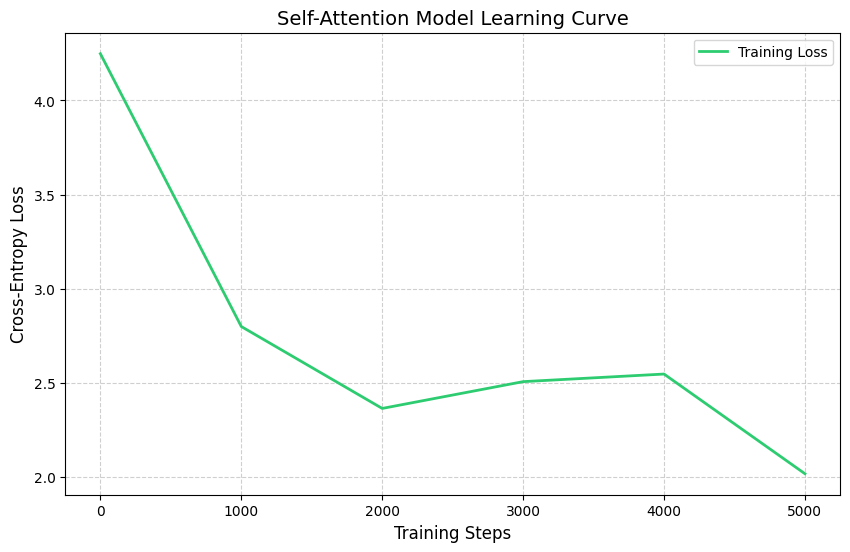

In [49]:
def plot_learning_curve_with_Self_Attention(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('Self-Attention Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_with_Self_Attention(history, eval_interval=1000)

In [67]:
# the result still isn't good enough!!! one thing we can do is to stack multiple heads of self-attention and then stack multiple layers of such heads to make it deeper
# so let's try that
# let's create a multi-head self-attention mechanism and stack multiple layers of it

class MultiHeadAttention(nn.Module):
    """ Multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size, feature_dim):

        super().__init__()
        self.heads = nn.ModuleList([Head(feature_dim, head_size) for _ in range(num_heads)])
        

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        
        return out
    

class SelfAttentionMultiHead(nn.Module): 
    """ Multi-head self-attention followed by a feed-forward network """

    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)  # Assuming max sequence length of block_size
        self.multihead_attention = MultiHeadAttention(num_heads=4, head_size=feature_dim // 4, feature_dim= feature_dim)


    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape
        
        # 1. Embed the input tokens to get their feature representations
        token_embedding = self.token_embedding_table(indices)  # Shape: (Batch, Time, Feature_Dim)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))  # Shape: (Time, Feature_Dim)
        x = token_embedding + posiitional_indices  # Shape: (Batch, Time, Feature_Dim)
        x = self.multihead_attention(x)  # Apply self-attention
        logits = self.language_model_head(x)  # Initial logits (not used further)


        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices

In [68]:
multiHead = SelfAttentionMultiHead(vocab_size, feature_dim=32)  

optimizer_Multi_Head = torch.optim.AdamW(multiHead.parameters(), lr=1e-3)


history = train_model(multiHead, optimizer_Multi_Head, training_steps=5000)

final_metrics = evaluate_model(multiHead)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.2730
Step [ 1000/5000] - Training Loss: 2.8023
Step [ 2000/5000] - Training Loss: 2.0810
Step [ 3000/5000] - Training Loss: 2.4527
Step [ 4000/5000] - Training Loss: 2.5353
Step [ 4999/5000] - Training Loss: 2.4869
Training Complete. Final Loss: 2.4869
=== Evaluation Results ===
Train Loss: 2.3850
Val Loss:   2.4306


In [70]:
print(detokenize(multiHead.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


Ttt-
AENIN
BOTES:
IUCAnd aland palth wu son hale Memasd!
Thar therit wne athy thate thof thit keend sere, athe, propr whon It fromd tuce
And
Niesiepeolg yof sand:
Crll f heeth au.


NI by with this! fof wio dind droull, poinviribe pod.

Whinoul
An:
Cill foo yo thigauddrmet:
Teatllros?
SI:
Bueryolome.
Bis pard no nei, mame nosr.

IAgIoy ad mo thath you thepe Mard and, bat swith or treamy tour wUBLityenditt we athy toug, aum fasche wan.

KWhetp I pa
BE
Wheerd'an, daPrtar, ved werull shat
Rriouf fa


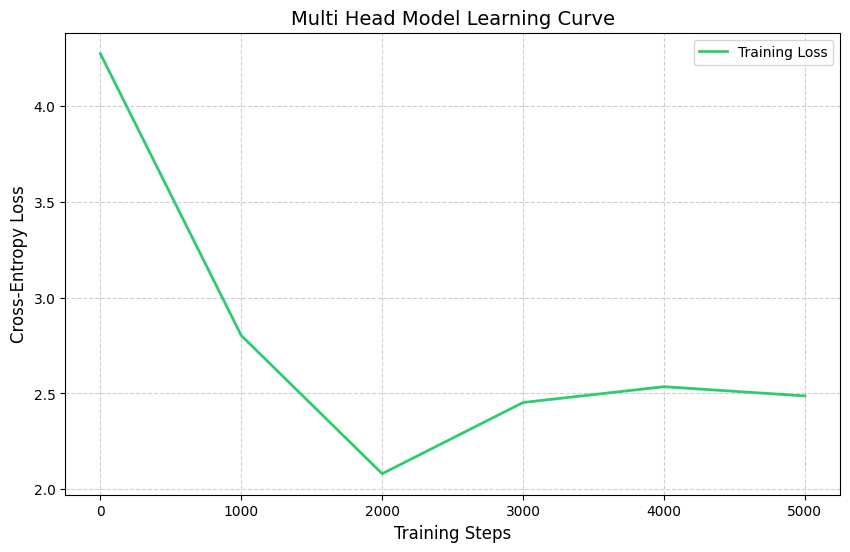

In [69]:
def plot_learning_curve_Multi_Head(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('Multi Head Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_Multi_Head(history, eval_interval=1000)

In [72]:
#up until now the model goes to calculate the logit too soon and because of that token doesn't have enough time to learn anything
# so let's add a single layer to it and give it the ability to think and learn more

In [ ]:
class MultiHeadThinker(nn.Module):
    """ Multi-head self-attention followed by a feed-forward network """

    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)  # Assuming max sequence length of block_size
        self.multihead_attention = MultiHeadAttention(num_heads=4, head_size=feature_dim // num_heads, feature_dim= feature_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(feature_dim, feature_dim * 4),
            nn.ReLU(),
            nn.Linear(feature_dim * 4, feature_dim)
        )


    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape

        # 1. Embed the input tokens to get their feature representations
        token_embedding = self.token_embedding_table(indices)  # Shape: (Batch, Time, Feature_Dim)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))  # Shape: (Time, Feature_Dim)
        x = token_embedding + posiitional_indices  # Shape: (Batch, Time, Feature_Dim)
        x = self.multihead_attention(x)  # Apply self-attention
        x = self.feed_forward(x)  # Apply feed-forward network
        logits = self.language_model_head(x)  # Initial logits (not used further)


        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices

In [82]:
thinker = MultiHeadThinker(vocab_size, feature_dim=32)  

optimizer_Thinker = torch.optim.AdamW(thinker.parameters(), lr=1e-3)


history = train_model(thinker, optimizer_Thinker, training_steps=5000)

final_metrics = evaluate_model(thinker)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.2151
Step [ 1000/5000] - Training Loss: 2.1952
Step [ 2000/5000] - Training Loss: 2.6396
Step [ 3000/5000] - Training Loss: 2.7382
Step [ 4000/5000] - Training Loss: 2.1223
Step [ 4999/5000] - Training Loss: 2.1470
Training Complete. Final Loss: 2.1470
=== Evaluation Results ===
Train Loss: 2.3616
Val Loss:   2.3828


In [76]:
print(detokenize(thinker.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


ste an
Ther'.
Ande ave od ortu wo wou yowy;-gar Con ky in gron ond las angin wegems' buas wear thunt mith an's the hipth ac, thut, for isd the tindem. ARRUMEnde wer ind chut theer lice Enghou la.
CLSANTICUSA::
I nomy tousws, beave id hadlk' Oeed gre crnseme tout' on cod ane I dor kisut:
Qe, Is dee weraing edn my Reed tive my thad thy ou sord--neletlul heess heady parer ard ateriody do to ardse's thibe ath you dorbisthopdanpigste thes mness ilf ancicest,
thithof
Yo fry cou Woms.

ICET:
Thouds ald


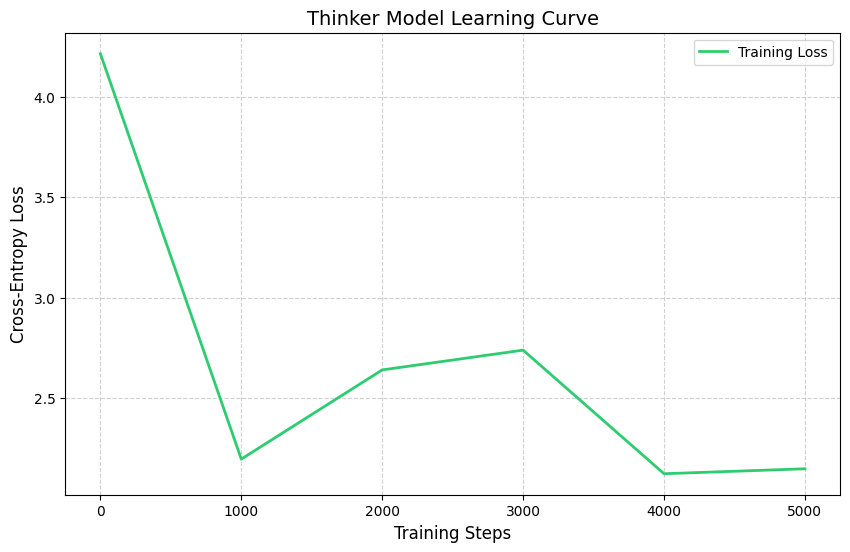

In [83]:
def plot_learning_curve_Thinker(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('Thinker Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_Thinker(history, eval_interval=1000)

In [79]:
#now let's go even deeper to the network and apply multiple layers of multihead
#let's build our block first
class FeedForward(nn.Module):
    """ A simple linear layer followed by a non-linearity """

    def __init__(self, feature_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feature_dim, feature_dim * 4),
            nn.ReLU(),
            nn.Linear(feature_dim * 4, feature_dim)
        )

    def forward(self, x):
        return self.net(x)



class Block(nn.Module):
    """ Transform block: communication followed by computation """

    def __init__(self, feature_dim , num_head):
        super().__init__()
        head_size = feature_dim // num_head
        self.self_attention_head = MultiHeadAttention(num_head, head_size, feature_dim)
        self.ffwd = FeedForward(feature_dim)
    def forward(self, x):
        x =self.self_attention_head(x)
        x =self.ffwd(x)
        return x   

     
class MultiHeadMultiLayer(nn.Module):
    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)  # Assuming max sequence length of block_size
        self.multihead_attention = MultiHeadAttention(num_heads=4, head_size=feature_dim // 4, feature_dim= feature_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(feature_dim, feature_dim * 4),
            nn.ReLU(),
            nn.Linear(feature_dim * 4, feature_dim)
        )


    

    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape

        # 1. Embed the input tokens to get their feature representations
        token_embedding = self.token_embedding_table(indices)  # Shape: (Batch, Time, Feature_Dim)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))  # Shape: (Time, Feature_Dim)
        x = token_embedding + posiitional_indices  # Shape: (Batch, Time, Feature_Dim)
        x = self.multihead_attention(x)  # Apply self-attention
        x = self.feed_forward(x)  # Apply feed-forward network
        logits = self.language_model_head(x)  # Initial logits (not used further)


        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices
    

In [84]:
multimodel = MultiHeadMultiLayer(vocab_size, feature_dim=32)
optimizer_MultiModel = torch.optim.AdamW(multimodel.parameters(), lr=1e-3)
history = train_model(multimodel, optimizer_MultiModel, training_steps=5000)
final_metrics = evaluate_model(multimodel)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.1754
Step [ 1000/5000] - Training Loss: 2.3128
Step [ 2000/5000] - Training Loss: 2.6443
Step [ 3000/5000] - Training Loss: 2.4922
Step [ 4000/5000] - Training Loss: 2.5487
Step [ 4999/5000] - Training Loss: 2.5091
Training Complete. Final Loss: 2.5091
=== Evaluation Results ===
Train Loss: 2.3043
Val Loss:   2.3028


In [81]:
print(detokenize(multimodel.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))



ROT:
whave gou, ther bour duser,
Pel an saingb sodst tonn thanged, werse nowsly leaid ouce! nosmesplioddme ut
Tin?
We han fairing anced winll this er'
Aond Osestill thay whiss tot rairly IErd a thay lele pand co,
pe aromelaverd, urs roou fowsuss: dows dond thaf am tou sheould
Lou you tould tno me lou, briwardd geme ,
Whank an arabns.

UYRET:
And riud? days? ass thavr dat .'
Thy as yons, thad a nopsont- mr bemastse
RASNALONIARKEREPy to ad ang I blak,
Pou kink, wor tom, kicirt thand!
Thert me you


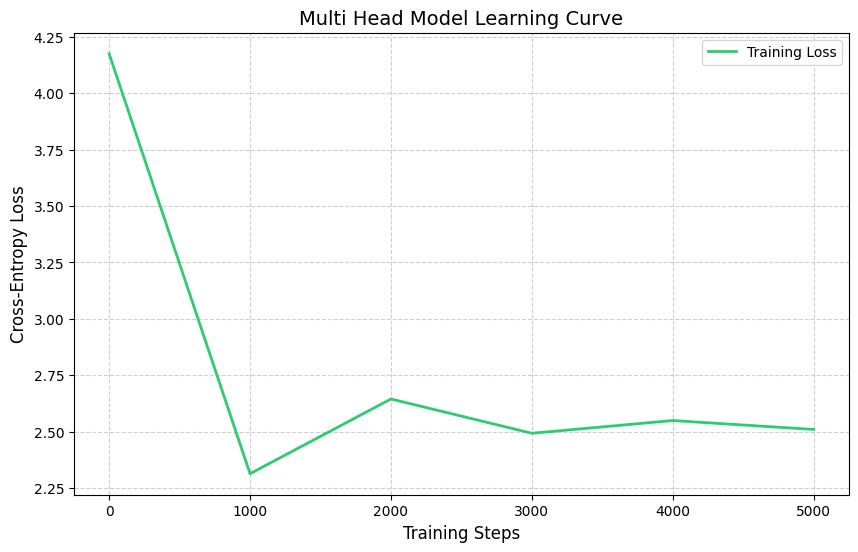

In [85]:
def plot_learning_curve_Multi_Layer(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('Multi Head Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_Multi_Layer(history, eval_interval=1000)

In [ ]:
class NewMultiHead(nn.Module):
    def __init__(self, num_heads, head_size, feature_dim):
        super().__init__()
        self.head_size = head_size
        self.num_heads = num_heads
        self.feature_dim = feature_dim
        self.heads = nn.ModuleList([Head(feature_dim, head_size) for _ in range(num_heads)])  # Pass feature_dim first
        self.projection = nn.Linear(feature_dim, feature_dim)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        return self.projection(out)

class NewBlock(nn.Module):
    """ Transform block: communication followed by computation """

    def __init__(self, feature_dim, num_head):
        super().__init__()
        self.feature_dim = feature_dim
        self.num_head = num_head
        head_size = feature_dim // num_head
        self.self_attention_head = NewMultiHead(num_heads=num_head, head_size=head_size, feature_dim=feature_dim)
        self.ffwd = NewFeedForward(feature_dim)

    def forward(self, x):
        x = x + self.self_attention_head(x)
        x = x + self.ffwd(x)
        return x

class NewFeedForward(nn.Module):
    """ A simple linear layer followed by a non-linearity """

    def __init__(self, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.net = nn.Sequential(
            nn.Linear(feature_dim, feature_dim * 4),
            nn.ReLU(),
            nn.Linear(feature_dim * 4, feature_dim)
        )

    def forward(self, x):
        return self.net(x)

class NonLinearMultiHead(nn.Module):
    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.vocab_size = vocab_size
        self.blocks = nn.Sequential(
            NewBlock(feature_dim, num_head=4),
            NewBlock(feature_dim, num_head=4),
            NewBlock(feature_dim, num_head=4)
        )
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)

    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape

        token_embedding = self.token_embedding_table(indices)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))
        x = token_embedding + posiitional_indices
        x = self.blocks(x)
        logits = self.language_model_head(x)

        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices


In [103]:
NLMH = NonLinearMultiHead(vocab_size, feature_dim=32)
optimizer_NLMH = torch.optim.AdamW(NLMH.parameters(), lr=1e-3)
NLMH_history = train_model(NLMH, optimizer_NLMH, training_steps=5000)
NLMH_metrics = evaluate_model(NLMH)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.7884
Step [ 1000/5000] - Training Loss: 2.6530
Step [ 2000/5000] - Training Loss: 2.3211
Step [ 3000/5000] - Training Loss: 1.8202
Step [ 4000/5000] - Training Loss: 2.1690
Step [ 4999/5000] - Training Loss: 2.2292
Training Complete. Final Loss: 2.2292
=== Evaluation Results ===
Train Loss: 2.1905
Val Loss:   2.2407


In [104]:
print(detokenize(NLMH.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


Wone alld I oain in sourgiow youre hing, weway's' ruo.

No so haverme I rake furegerel the way with
The cos'lde.

Lok I, and hivere in platong het the jut oficomplakes, wofer thing will me
Cras, gutthe have hancisiepeantun to ared rookict Is hand fyaosw'lter, wathellms note cencrourte -but to dond prose fourto, uure hanird
To head; 
Theick's cepon.

So seater;
Blink hees ofuulr to he thert, geeted in his ome comtameiss that onicsbont you.

Keverse his to, I gooos a
To hast wekit his awhour Whoul


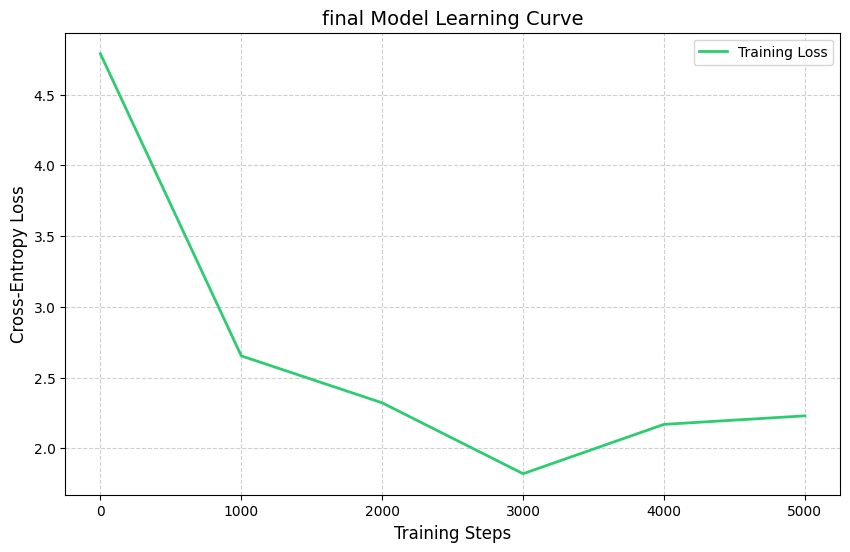

In [105]:
def plot_learning_curve_NLMH(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('NLMH Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_NLMH(NLMH_history, eval_interval=1000)

In [106]:
# now let's add a layernorm to the model
class LayerNorm1d(nn.Module):
    def __init__(self, feature_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        self.gamma = nn.Parameter(torch.ones(feature_dim))
        self.beta = nn.Parameter(torch.zeros(feature_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta
    

In [ ]:
# now we are going to define block with layernorm
class BlockWithLayerNorm(nn.Module):
    def __init__(self, feature_dim, num_head):
        super().__init__()
        head_size = feature_dim // num_head
        self.self_attention_head = NewMultiHead(num_head, head_size, feature_dim)
        self.ffwd = NewFeedForward(feature_dim)
        self.ln1 = LayerNorm1d(feature_dim)
        self.ln2 = LayerNorm1d(feature_dim)

    def forward(self, x):
        x = x + self.self_attention_head(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

In [112]:
# now lets build a model and instead of previous block call blockwithlayernorm on it

class NonLinearLayerNorm(nn.Module):
    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.vocab_size = vocab_size
        self.blocks = nn.Sequential(
            BlockWithLayerNorm(feature_dim, num_head=4),
            BlockWithLayerNorm(feature_dim, num_head=4),
            BlockWithLayerNorm(feature_dim, num_head=4),
            LayerNorm1d(feature_dim)
        )
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)

    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape

        token_embedding = self.token_embedding_table(indices)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))
        x = token_embedding + posiitional_indices
        x = self.blocks(x)
        logits = self.language_model_head(x)

        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices


In [113]:
NLLN = NonLinearLayerNorm(vocab_size, feature_dim=32)
optimizer_NLLN = torch.optim.AdamW(NLLN.parameters(), lr=1e-3)
NLLN_history = train_model(NLLN, optimizer_NLLN, training_steps=5000)
NLLN_metrics = evaluate_model(NLLN)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.4902
Step [ 1000/5000] - Training Loss: 2.5028
Step [ 2000/5000] - Training Loss: 2.5508
Step [ 3000/5000] - Training Loss: 2.1812
Step [ 4000/5000] - Training Loss: 2.1728
Step [ 4999/5000] - Training Loss: 2.2398
Training Complete. Final Loss: 2.2398
=== Evaluation Results ===
Train Loss: 2.1922
Val Loss:   2.2224


In [114]:
print(detokenize(NLLN.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))


Thelus, bold yespith herint To then soway etpreot iamay, come Cith neactle mesint
Cravugsly and imorrs nir:; therrt; hatinges
Tordss ithe,
Nour maspes hame seanfort you eemt fruten hont neefor erubingon: leay bed ande, lred's raiomo provemmm
In suudse sohe, whot crelemmellse trimrsble; he menle andepaows,
Torstengearl;
Thomeapragyt
Fashpell
BORedd:
Be hishs cheart miake the is,
O to knod
Sanch, goot onteam and
Onttheed pleets enot in your,
Gon flusell repen ondowint the weaterene caill has shion


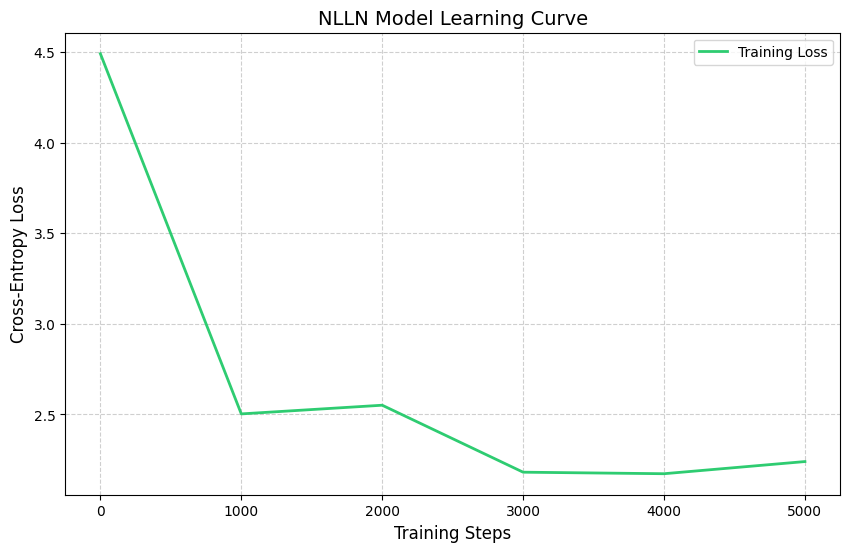

In [115]:
def plot_learning_curve_NLLN(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('NLLN Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_NLLN(NLLN_history, eval_interval=1000)

In [116]:
# now let's add dropout to feedforward and multiheadattention and our block
class FeedForwardWithDropout(nn.Module):
    def __init__(self, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.net = nn.Sequential(
            nn.Linear(feature_dim, feature_dim * 4),
            nn.ReLU(),
            nn.Linear(feature_dim * 4, feature_dim),
            nn.Dropout(0.2)
        )

    def forward(self, x):
        return self.net(x)
    
class MultiHeadWithDropout(nn.Module):
    def __init__(self, num_heads, head_size, feature_dim):
        super().__init__()
        self.head_size = head_size
        self.num_heads = num_heads
        self.feature_dim = feature_dim
        self.heads = nn.ModuleList([HeadWithDropout(feature_dim, head_size) for _ in range(num_heads)])  # Pass feature_dim first
        self.projection = nn.Linear(feature_dim, feature_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.projection(out)
        return self.dropout(out)    
    

class BlockWithDropout(nn.Module):
    def __init__(self, feature_dim, num_head):
        super().__init__()
        head_size = feature_dim // num_head
        self.self_attention_head = MultiHeadWithDropout(num_head, head_size, feature_dim)
        self.ffwd = FeedForwardWithDropout(feature_dim)
        self.ln1 = LayerNorm1d(feature_dim)
        self.ln2 = LayerNorm1d(feature_dim)

    def forward(self, x):
        x = x + self.self_attention_head(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x    
    

# we can also add dropout to Head

class HeadWithDropout(nn.Module):
    def __init__(self, feature_dim, head_size):
        super().__init__()
        self.feature_dim = feature_dim
        self.head_size = head_size
        self.key = nn.Linear(feature_dim, head_size, bias=False)
        self.query = nn.Linear(feature_dim, head_size, bias=False)
        self.value = nn.Linear(feature_dim, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        batch_size, sequence_length, feature_dim = x.shape
        k = self.key(x)
        q = self.query(x)
        v = self.value(x)
        wei = q @ k.transpose(-2, -1) * feature_dim ** -0.5
        wei = wei.masked_fill(self.tril[:sequence_length, :sequence_length] == 0, float('-inf'))
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        out = wei @ v
        return out    
    
#Let's tune some of our Hyperparameters

batch_size = 64
block_size = 256
max_iters = 5000
eval_interval = 500
eval_iters = 200
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
feature_dim = 384
num_head = 6
n_layers = 6
dropout = 0.2
# now let's build a model and instead of previous block call blockwithlayernorm on it

class NonLinearDropout(nn.Module):
    def __init__(self, vocab_size, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.vocab_size = vocab_size
        self.blocks = nn.Sequential(
            *[BlockWithDropout(feature_dim, num_head) for _ in range(n_layers)],
            LayerNorm1d(feature_dim)
        )
        self.token_embedding_table = nn.Embedding(vocab_size, feature_dim)
        self.language_model_head = nn.Linear(feature_dim, vocab_size)
        self.positional_embedding_table = nn.Embedding(block_size, feature_dim)

    def forward(self, indices, targets=None):
        batch_size, sequence_length = indices.shape

        token_embedding = self.token_embedding_table(indices)
        posiitional_indices = self.positional_embedding_table(torch.arange(sequence_length))
        x = token_embedding + posiitional_indices
        x = self.blocks(x)
        logits = self.language_model_head(x)

        if targets is None:
            loss = None
        else:
            batch_size, sequence_length, vocab_channels = logits.shape
            logits_flattened = logits.view(batch_size * sequence_length, vocab_channels)
            targets_flattened = targets.view(batch_size * sequence_length)
            loss = F.cross_entropy(logits_flattened, targets_flattened)

        return logits, loss

    def generate(self, indices, max_new_tokens):
        for _ in range(max_new_tokens):
            indices_condensed = indices[:, -block_size:]
            logits, _ = self(indices_condensed)
            last_token_logits = logits[:, -1, :]
            probabilities = F.softmax(last_token_logits, dim=-1)
            next_token_index = torch.multinomial(probabilities, num_samples=1)
            indices = torch.cat((indices, next_token_index), dim=1)
        return indices    

In [117]:
NLDO = NonLinearDropout(vocab_size, feature_dim=feature_dim)
optimizer_NLDO = torch.optim.AdamW(NLDO.parameters(), lr=learning_rate)
NLDO_history = train_model(NLDO, optimizer_NLDO, training_steps=max_iters)
NLDO_metrics = evaluate_model(NLDO)

=== Starting Training for 5000 steps ===
Step [    0/5000] - Training Loss: 4.3154
Step [ 1000/5000] - Training Loss: 1.7188
Step [ 2000/5000] - Training Loss: 1.4372
Step [ 3000/5000] - Training Loss: 1.3017
Step [ 4000/5000] - Training Loss: 1.2405
Step [ 4999/5000] - Training Loss: 1.1966
Training Complete. Final Loss: 1.1966
=== Evaluation Results ===
Train Loss: 1.0904
Val Loss:   1.4877


In [118]:
print(detokenize(NLDO.generate(indices=torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()))



Shepherd:
Hie I the wire suspect and costest of me.

BAPTISTER:
Well, I say, by you; are thus, I have good quick'd the cage.

QUEEN MARGARET:
No dontious too topstrong upon me welcomedion,
It will from your goods.

EDWARD:
'Twas too better your force his struck!
Orther bethink, Edward be forth;
And when you do hes? what shall I be fair credgary?

NORFOLK:
I black what I would live as must give,
The wine of the King and oak of his be sense
For curst.

LORDSS XILNNT:
Lewise the Forbids o'
Upon a 


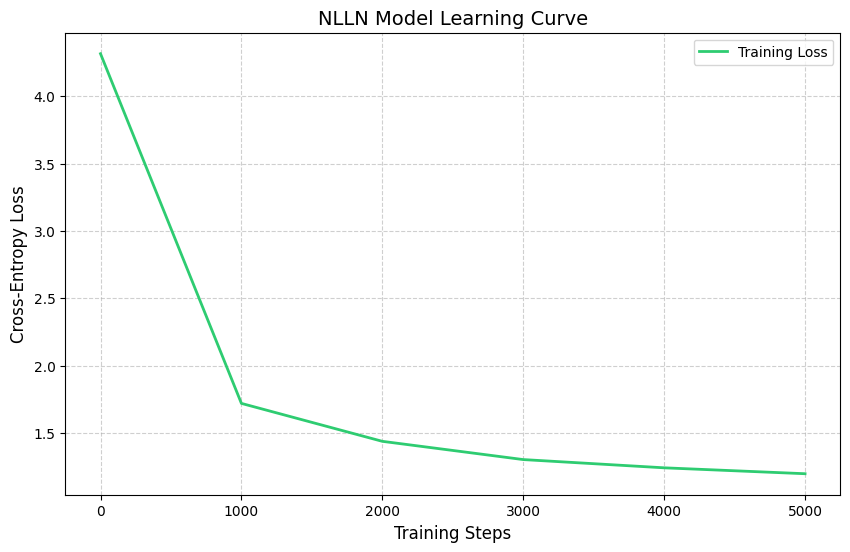

In [119]:
def plot_learning_curve_NLDO(history, eval_interval):
    """
    Visualizes the loss reduction over time.
    """
    plt.figure(figsize=(10, 6))
    
    # Create the x-axis based on the evaluation intervals
    steps = [i * eval_interval for i in range(len(history))]
    
    plt.plot(steps, history, label='Training Loss', color='#2ecc71', linewidth=2)
    
    # Formatting the chart
    plt.title('NLDO Model Learning Curve', fontsize=14)
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Cross-Entropy Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.show()



# Call the function using the history from your training
plot_learning_curve_NLLN(NLDO_history, eval_interval=1000)